In [55]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import scipy.io
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data=pd.read_csv('MG.TO.OLD.csv')
datamatrix=data.to_numpy()

There are 7 numbers per day.

The first one is the date.

The others are opening price, high price, low price, closing price, adjusted closing price , and the volume traded.

I am getting rid of the date stamp, and then only taking opening price, high price, low price, and closing price. This comes to 4 numbers per day.

In [57]:
mat=datamatrix[:,1:5]

mat1 = mat                # open high low close
mat2 = mat[:, [0,2,1,3]]  # open low high close
mat3 = mat[:, [3,2,1,0]]  # close low high open
mat4 = mat[:, [3,1,2,0]]  # close high low open
mat5 = mat[:, [1,3,0,2]]  # high close open low

Now I flatten this data to get a one dimensional time series.

In [58]:
nTotal=1254*4
xx1=np.reshape(mat1,nTotal)
xx2=np.reshape(mat2,nTotal)
xx3=np.reshape(mat3,nTotal)
xx4=np.reshape(mat4,nTotal)
xx5=np.reshape(mat5,nTotal)

Let us normalize first.

In [59]:
M=max(xx1)
m=min(xx1)
# the min and max of the five arrays are the same
nxx1 = 1 + (xx1 - m)/(M - m)
nxx2 = 1 + (xx2 - m)/(M - m)
nxx3 = 1 + (xx3 - m)/(M - m)
nxx4 = 1 + (xx4 - m)/(M - m)
nxx5 = 1 + (xx5 - m)/(M - m)

Now I have 5016 numbers to work with.

I decided to go with a window size of 16.

I am going to input 1 number per time-slot.

This is an arbitrary decision.

I will try to predict the 17th number in the series.

I have to figure out the number of samples. Let us denote this by NS.

But before that, here is a crucial step. If we do not this, TensorFlow will complain!

In [60]:
nxx1 = np.asarray(nxx1).astype('float32')
nxx2 = np.asarray(nxx2).astype('float32')
nxx3 = np.asarray(nxx3).astype('float32')
nxx4 = np.asarray(nxx4).astype('float32')
nxx5 = np.asarray(nxx5).astype('float32')

In [61]:
w=16   ### Window size of 16
NS=int(np.floor(nTotal/w*1))   #### Number of Samples

This time, we can use all 313 windows.

There are some 5016 - 5008 = 8 numbers, of which the first one could be the target for the last window.

Let us do the Target picking first.

In [62]:
zind=np.arange(w,nTotal,w)
z1=nxx1[zind]
z2=nxx2[zind]
z3=nxx3[zind]
z4=nxx4[zind]
z5=nxx5[zind]

I get the input data from the first 5008 numbers.

In [63]:
NS=313
x1=np.reshape(nxx1[:-8],(NS,w,1))
x1=tf.convert_to_tensor(x1)

x2=np.reshape(nxx2[:-8],(NS,w,1))
x2=tf.convert_to_tensor(x2)

x3=np.reshape(nxx3[:-8],(NS,w,1))
x3=tf.convert_to_tensor(x3)

x4=np.reshape(nxx4[:-8],(NS,w,1))
x4=tf.convert_to_tensor(x4)

x5=np.reshape(nxx5[:-8],(NS,w,1))
x5=tf.convert_to_tensor(x5)

In [64]:
xtrain1=x1[0:200,:,:]
xtest1=x1[200:313,:,:]
ztrain1=z1[0:200]
ztest1=z1[200:313]

xtrain2=x2[0:200,:,:]
xtest2=x2[200:313,:,:]
ztrain2=z2[0:200]
ztest2=z2[200:313]

xtrain3=x3[0:200,:,:]
xtest3=x3[200:313,:,:]
ztrain3=z3[0:200]
ztest3=z3[200:313]

xtrain4=x4[0:200,:,:]
xtest4=x4[200:313,:,:]
ztrain4=z4[0:200]
ztest4=z4[200:313]

xtrain5=x5[0:200,:,:]
xtest5=x5[200:313,:,:]
ztrain5=z5[0:200]
ztest5=z5[200:313]

In [65]:
model1 = Sequential()
model1.add(SimpleRNN(145, input_shape=(16,1), activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.compile(loss='mean_squared_error', optimizer='adam')

model2 = Sequential()
model2.add(SimpleRNN(145, input_shape=(16,1), activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')

model3 = Sequential()
model3.add(SimpleRNN(145, input_shape=(16,1), activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer='adam')

model4 = Sequential()
model4.add(SimpleRNN(145, input_shape=(16,1), activation='relu'))
model4.add(Dense(1, activation='linear'))
model4.compile(loss='mean_squared_error', optimizer='adam')

model5 = Sequential()
model5.add(SimpleRNN(145, input_shape=(16,1), activation='relu'))
model5.add(Dense(1, activation='linear'))
model5.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
model1.fit(xtrain1, ztrain1, epochs=40, batch_size=1, verbose=2)
model2.fit(xtrain2, ztrain2, epochs=40, batch_size=1, verbose=2)
model3.fit(xtrain3, ztrain3, epochs=40, batch_size=1, verbose=2)
model4.fit(xtrain4, ztrain4, epochs=40, batch_size=1, verbose=2)
model5.fit(xtrain5, ztrain5, epochs=40, batch_size=1, verbose=2)

Epoch 1/40
200/200 - 2s - loss: 0.0380 - 2s/epoch - 10ms/step
Epoch 2/40
200/200 - 1s - loss: 1.6929e-04 - 1s/epoch - 6ms/step
Epoch 3/40
200/200 - 1s - loss: 3.1561e-04 - 1s/epoch - 7ms/step
Epoch 4/40
200/200 - 1s - loss: 1.8467e-04 - 942ms/epoch - 5ms/step
Epoch 5/40
200/200 - 1s - loss: 2.3063e-04 - 963ms/epoch - 5ms/step
Epoch 6/40
200/200 - 1s - loss: 2.3895e-04 - 952ms/epoch - 5ms/step
Epoch 7/40
200/200 - 1s - loss: 3.1708e-04 - 946ms/epoch - 5ms/step
Epoch 8/40
200/200 - 1s - loss: 1.7591e-04 - 945ms/epoch - 5ms/step
Epoch 9/40
200/200 - 1s - loss: 2.0807e-04 - 928ms/epoch - 5ms/step
Epoch 10/40
200/200 - 1s - loss: 2.2717e-04 - 947ms/epoch - 5ms/step
Epoch 11/40
200/200 - 1s - loss: 2.2526e-04 - 942ms/epoch - 5ms/step
Epoch 12/40
200/200 - 1s - loss: 2.2162e-04 - 952ms/epoch - 5ms/step
Epoch 13/40
200/200 - 1s - loss: 3.6513e-04 - 946ms/epoch - 5ms/step
Epoch 14/40
200/200 - 1s - loss: 3.3383e-04 - 1s/epoch - 6ms/step
Epoch 15/40
200/200 - 1s - loss: 1.8524e-04 - 1s/epoch - 7

In [67]:
xpredicted1=model1.predict(xtest1)
xpredicted2=model2.predict(xtest2)
xpredicted3=model3.predict(xtest3)
xpredicted4=model4.predict(xtest4)
xpredicted5=model5.predict(xtest5)

4/4 [==============================] - 0s 4ms/step


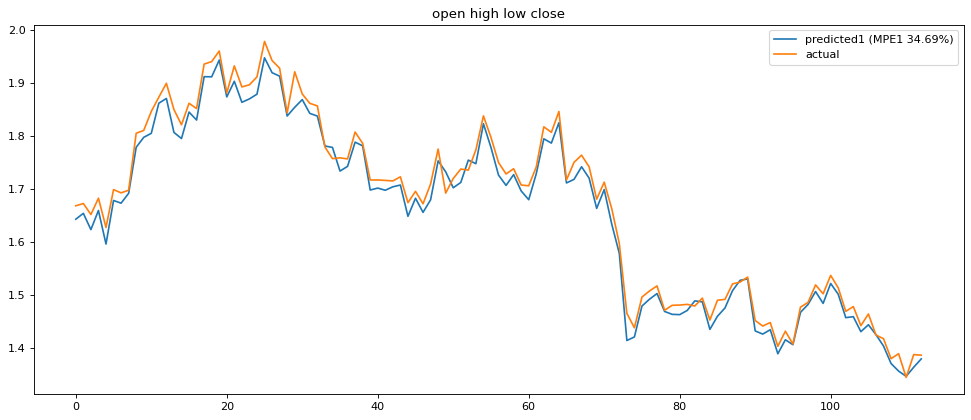

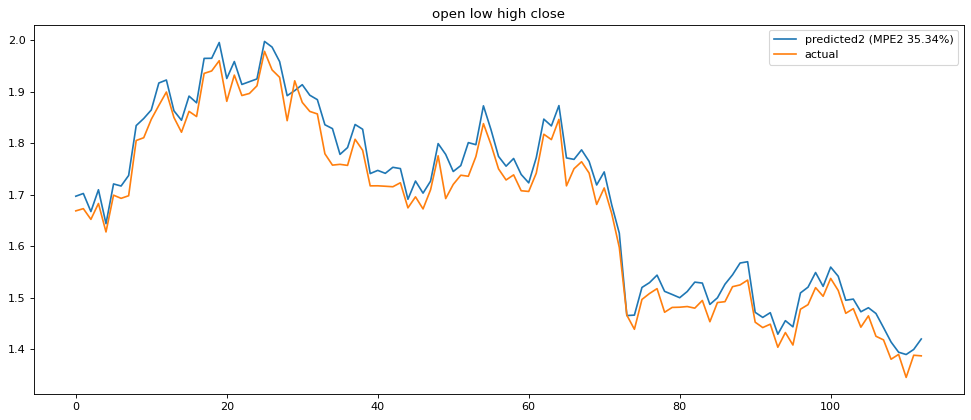

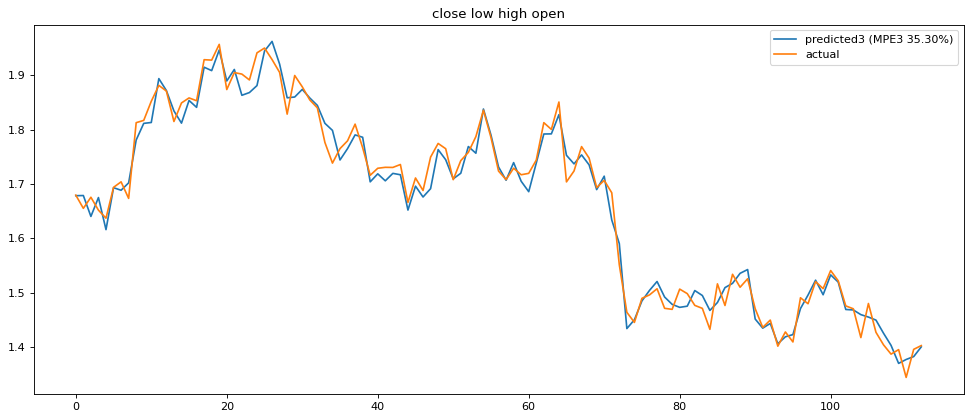

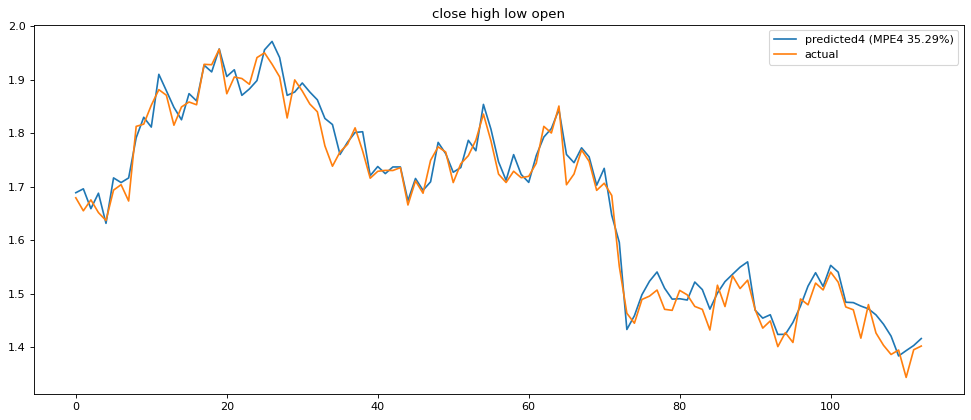

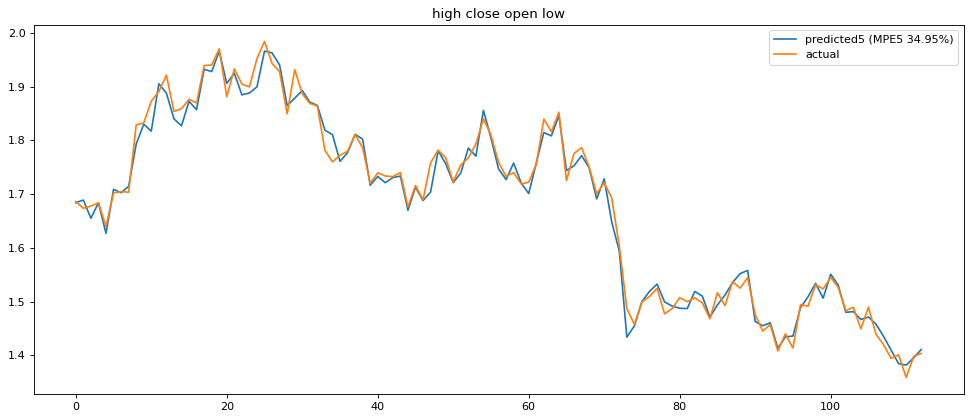

In [68]:
MaxTarget1 = np.max(ztest1)
MinTarget1 = np.min(ztest1)
TargetRange1 = MaxTarget1 - MinTarget1
mpe1 = np.sum(np.abs((xpredicted1 - ztest1) / TargetRange1)) / len(ztest1)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(113), xpredicted1, label='predicted1 (MPE1 {:.2%})'.format(mpe1/100))
plt.plot(range(113), ztest1, label='actual'.format(2))
plt.legend(loc='best')
plt.title('open high low close')
plt.show()

MaxTarget2 = np.max(ztest2)
MinTarget2 = np.min(ztest2)
TargetRange2 = MaxTarget2 - MinTarget2
mpe2 = np.sum(np.abs((xpredicted2 - ztest2) / TargetRange2)) / len(ztest2)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(113), xpredicted2, label='predicted2 (MPE2 {:.2%})'.format(mpe2/100))
plt.plot(range(113), ztest2, label='actual'.format(2))
plt.legend(loc='best')
plt.title('open low high close')
plt.show()

MaxTarget3 = np.max(ztest3)
MinTarget3 = np.min(ztest3)
TargetRange3 = MaxTarget3 - MinTarget3
mpe3 = np.sum(np.abs((xpredicted3 - ztest3) / TargetRange3)) / len(ztest3)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(113), xpredicted3, label='predicted3 (MPE3 {:.2%})'.format(mpe3/100))
plt.plot(range(113), ztest3, label='actual'.format(2))
plt.legend(loc='best')
plt.title('close low high open')
plt.show()

MaxTarget4= np.max(ztest4)
MinTarget4 = np.min(ztest4)
TargetRange4 = MaxTarget4 - MinTarget4
mpe4 = np.sum(np.abs((xpredicted4 - ztest4) / TargetRange4)) / len(ztest4)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(113), xpredicted4, label='predicted4 (MPE4 {:.2%})'.format(mpe4/100))
plt.plot(range(113), ztest4, label='actual'.format(2))
plt.legend(loc='best')
plt.title('close high low open')
plt.show()

MaxTarget5 = np.max(ztest5)
MinTarget5 = np.min(ztest5)
TargetRange5 = MaxTarget5 - MinTarget5
mpe5 = np.sum(np.abs((xpredicted5 - ztest5) / TargetRange5)) / len(ztest5)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(113), xpredicted5, label='predicted5 (MPE5 {:.2%})'.format(mpe5/100))
plt.plot(range(113), ztest5, label='actual'.format(2))
plt.legend(loc='best')
plt.title('high close open low')
plt.show()